## AutoEncoder Example
Reference: https://blog.keras.io/building-autoencoders-in-keras.html

- An Autoencoder model has three important components. The encoder side, the autoencoder in the middle, and a deocoder side. Therefore we have three models representing each component of the whole network.

![alt text](autoencoder_schema.jpg)

### Importing required libraries

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np

### Implementing components of the AutoEncoder

We have three models within the autoencoder setup.

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3566 - val_loss: 0.2696
Epoch 2/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2612 - val_loss: 0.2489
Epoch 3/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2381 - val_loss: 0.2254
Epoch 4/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2175 - val_loss: 0.2076
Epoch 5/50
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2025 - val_loss: 0.1951
Epoch 6/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1916 - val_loss: 0.1856
Epoch 7/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1831 - val_loss: 0.1780
Epoch 8/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1763 - val_loss: 0.1718
Epoch 9/50
60000/60000 [======================

In [9]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000, 32)
(10000, 784)


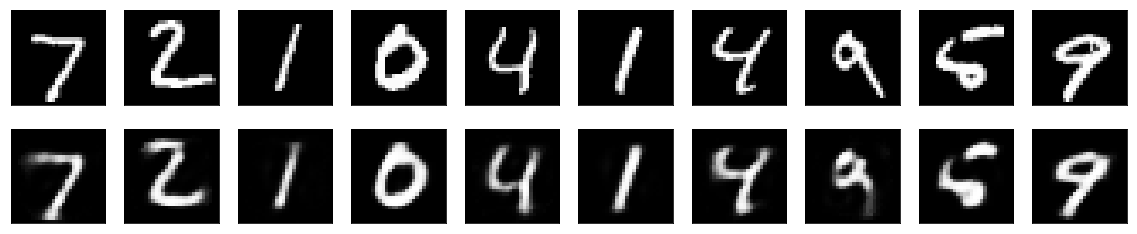

In [10]:
# use Matplotlib (don't ask)
%matplotlib inline
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()